In [1]:
import pandas as pd
import numpy as np

# 1. apply()

In [3]:
#创建数据
df = pd.DataFrame(np.random.randn(5,4))
df

,0,1,2,3
0,0.976806,-0.176659,-1.987187,0.334759
1,-1.595416,-3.060585,1.088546,-0.258329
2,-0.581111,-0.878873,-1.546874,-1.177826
3,-0.000862,0.182778,-0.311939,-0.969469
4,0.040958,-1.583389,-1.642360,-0.577521


**abs方法**

In [5]:
df.abs()

,0,1,2,3
0,0.976806,0.176659,1.987187,0.334759
1,1.595416,3.060585,1.088546,0.258329
2,0.581111,0.878873,1.546874,1.177826
3,0.000862,0.182778,0.311939,0.969469
4,0.040958,1.583389,1.642360,0.577521


**取出列最大值**

In [8]:
df.max()

0    0.976806
1    0.182778
2    1.088546
3    0.334759
dtype: float64

**使用 apply 方法 取出 列最大值**

In [10]:
df.apply(lambda x:x.max())

0    0.976806
1    0.182778
2    1.088546
3    0.334759
dtype: float64

**使用 apply 方法 去除  行最大值**

In [12]:
df.apply(lambda x:x.max(),axis=1)

0    0.976806
1    1.088546
2   -0.581111
3    0.182778
4    0.040958
dtype: float64

# 2. applymap()

**通过applyamp 将函数应用到每一个数据**

In [13]:
df

,0,1,2,3
0,0.976806,-0.176659,-1.987187,0.334759
1,-1.595416,-3.060585,1.088546,-0.258329
2,-0.581111,-0.878873,-1.546874,-1.177826
3,-0.000862,0.182778,-0.311939,-0.969469
4,0.040958,-1.583389,-1.642360,-0.577521


In [14]:
fuc = lambda x:"%.2f"%x  # 保留小数点 后两位

In [15]:
df.applymap(fuc)

,0,1,2,3
0,0.98,-0.18,-1.99,0.33
1,-1.60,-3.06,1.09,-0.26
2,-0.58,-0.88,-1.55,-1.18
3,-0.00,0.18,-0.31,-0.97
4,0.04,-1.58,-1.64,-0.58


# 排序

## 索引排序

In [17]:
s1 = pd.Series(np.arange(4),index=list("bdca"))
s1

b    0
d    1
c    2
a    3
dtype: int32

**升序**

In [18]:
s1.sort_index()  # 默认升序

a    3
b    0
c    2
d    1
dtype: int32

**降序  ascending = False**

In [19]:
s1.sort_index(ascending=False)  # 降序排列

d    1
c    2
b    0
a    3
dtype: int32

In [21]:
pd1 = pd.DataFrame(np.arange(12).reshape(4,3),index=list("bdca"),columns=list("BCA"))
pd1

,B,C,A
b,0,1,2
d,3,4,5
c,6,7,8
a,9,10,11


**按照行 排序**

In [22]:
pd1.sort_index()

,B,C,A
a,9,10,11
b,0,1,2
c,6,7,8
d,3,4,5


**按照 列排序**

In [23]:
pd1.sort_index(axis=1)

,A,B,C
b,2,0,1
d,5,3,4
c,8,6,7
a,11,9,10


## 按 值 排序

In [25]:
s1

b    0
d    1
c    2
a    3
dtype: int32

In [27]:
s1.sort_values()  # 有缺失值 Nan时 默认放到最后

b    0
d    1
c    2
a    3
dtype: int32

In [28]:
pd1

,B,C,A
b,0,1,2
d,3,4,5
c,6,7,8
a,9,10,11


In [29]:
pd1.sort_values(by="A")  # 按 列 排序

,B,C,A
b,0,1,2
d,3,4,5
c,6,7,8
a,9,10,11


In [30]:
pd2 = pd.DataFrame({"a":[3,7,9,0],"b":[1,-1,4,8],"c":[0,6,-3,2]})

In [32]:
pd2

,a,b,c
0,3,1,0
1,7,-1,6
2,9,4,-3
3,0,8,2


In [33]:
pd2.sort_values(by="b")  # 按 列 排序

,a,b,c
1,7,-1,6
0,3,1,0
2,9,4,-3
3,0,8,2


In [35]:
pd2.sort_values(by=["b"],ascending=False)  # 按 列 排序

,a,b,c
3,0,8,2
2,9,4,-3
0,3,1,0
1,7,-1,6


# 唯一值 和成员属性

In [36]:
s1 = pd.Series([2,6,8,9,8,3,6])
s1

0    2
1    6
2    8
3    9
4    8
5    3
6    6
dtype: int64

In [37]:
s1.unique()  # 数据唯一值

array([2, 6, 8, 9, 3], dtype=int64)

In [38]:
s1.value_counts()

6    2
8    2
2    1
9    1
3    1
dtype: int64

In [39]:
# 判断值是否存在  
s1.isin([8]) # 判断 8是否存在

0    False
1    False
2     True
3    False
4     True
5    False
6    False
dtype: bool

In [41]:
# 判断值是否存在  
s1.isin([8,2]) # 判断 8是否存在

0     True
1    False
2     True
3    False
4     True
5    False
6    False
dtype: bool

In [42]:
pd2

,a,b,c
0,3,1,0
1,7,-1,6
2,9,4,-3
3,0,8,2


In [44]:
pd2.isin([2])

,a,b,c
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,True


# 处理缺失数据

In [50]:
df3 = pd.DataFrame([np.random.randn(3),[1,2,np.nan],[np.nan,4,np.nan],[1,2,3]])
df3

,0,1,2
0,-1.189819,-0.878744,1.983294
1,1.000000,2.000000,NaN
2,NaN,4.000000,NaN
3,1.000000,2.000000,3.000000


In [51]:
# 1.判断是否存在 缺失值
df3.isnull()

,0,1,2
0,False,False,False
1,False,False,True
2,True,False,True
3,False,False,False


In [53]:
df3.isna()

,0,1,2
0,False,False,False
1,False,False,True
2,True,False,True
3,False,False,False


In [54]:
# 2. 丢弃缺失 数据
df3.dropna()  # 默认丢弃 行数据

,0,1,2
0,-1.189819,-0.878744,1.983294
3,1.000000,2.000000,3.000000


In [55]:
df3.dropna(axis=1)

,1
0,-0.878744
1,2.000000
2,4.000000
3,2.000000


In [59]:
# 3.填充缺失值
df3.fillna(-1)

,0,1,2
0,-1.189819,-0.878744,1.983294
1,1.000000,2.000000,-1.000000
2,-1.000000,4.000000,-1.000000
3,1.000000,2.000000,3.000000


# 层级索引 pass

# Pandas统计 计算和描述

In [67]:
df4 = pd.DataFrame([[1.4,np.nan],[7.1,-4.5],
                  [np.nan,np.nan],[0.75,-1.3]],
                   index=list("abcd"),columns=["one","two"]
                  )
df4

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [68]:
df4.sum()

one    9.25
two   -5.80
dtype: float64

In [69]:
df4.sum(axis=1)

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

In [71]:
df4.sum(axis=1,skipna=False)

a     NaN
b    2.60
c     NaN
d   -0.55
dtype: float64

In [73]:
df4.idxmax() # 返回最大值的索引

one    b
two    d
dtype: object

In [75]:
df4.cumsum()  # 累计求和

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


In [76]:
df4.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


In [78]:
ss = pd.Series(["a","a","b","c"]*4)
ss

0     a
1     a
2     b
3     c
4     a
5     a
6     b
7     c
8     a
9     a
10    b
11    c
12    a
13    a
14    b
15    c
dtype: object

In [79]:
ss.describe()

count     16
unique     3
top        a
freq       8
dtype: object

In [81]:
df4

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [84]:
df4.reindex(list("bacd"))

,one,two
b,7.10,-4.5
a,1.40,NaN
c,NaN,NaN
d,0.75,-1.3


# 离散化和面元划分

In [92]:
ages = [20,22,25,27,21,23,37,61,45,41,32]

In [93]:
# 面元 Bin
bins = [18,25,35,60,100]

In [94]:
cats = pd.cut(ages,bins)
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (35, 60], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 11
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [95]:
cats.codes

array([0, 0, 0, 1, 0, 0, 2, 3, 2, 2, 1], dtype=int8)

In [96]:
cats.categories

IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]], dtype='interval[int64, right]')

In [97]:
pd.value_counts(cats)

(18, 25]     5
(35, 60]     3
(25, 35]     2
(60, 100]    1
dtype: int64

In [98]:
# 控制 区间 是 开 还是闭
cats = pd.cut(ages,bins,right=False)
cats

[[18, 25), [18, 25), [25, 35), [25, 35), [18, 25), ..., [35, 60), [60, 100), [35, 60), [35, 60), [25, 35)]
Length: 11
Categories (4, interval[int64, left]): [[18, 25) < [25, 35) < [35, 60) < [60, 100)]

In [100]:
names = ["青年","年轻人","中年","老年"]
cats = pd.cut(ages,bins,labels= names)
cats

['青年', '青年', '青年', '年轻人', '青年', ..., '中年', '老年', '中年', '中年', '年轻人']
Length: 11
Categories (4, object): ['青年' < '年轻人' < '中年' < '老年']

In [101]:
data = np.random.rand(20)
data

array([0.29760568, 0.22972489, 0.06589841, 0.39125719, 0.74832237,
       0.4870485 , 0.65968286, 0.66391215, 0.3246347 , 0.54057217,
       0.84017275, 0.5667447 , 0.07769162, 0.67537004, 0.4201314 ,
       0.18347568, 0.15933005, 0.4637399 , 0.48253681, 0.77316257])

In [103]:
pd.cut(data,4,precision=2)  # 小数位数 2

[(0.26, 0.45], (0.065, 0.26], (0.065, 0.26], (0.26, 0.45], (0.65, 0.84], ..., (0.065, 0.26], (0.065, 0.26], (0.45, 0.65], (0.45, 0.65], (0.65, 0.84]]
Length: 20
Categories (4, interval[float64, right]): [(0.065, 0.26] < (0.26, 0.45] < (0.45, 0.65] < (0.65, 0.84]]

In [104]:
data2 = np.random.randn(1000)

In [106]:
cats2 = pd.qcut(data2,4)
cats2

[(-0.746, -0.0784], (0.659, 3.267], (0.659, 3.267], (0.659, 3.267], (-0.0784, 0.659], ..., (0.659, 3.267], (-2.759, -0.746], (-0.746, -0.0784], (-0.0784, 0.659], (-0.746, -0.0784]]
Length: 1000
Categories (4, interval[float64, right]): [(-2.759, -0.746] < (-0.746, -0.0784] < (-0.0784, 0.659] < (0.659, 3.267]]

In [108]:
cats2.value_counts()

(-2.759, -0.746]     250
(-0.746, -0.0784]    250
(-0.0784, 0.659]     250
(0.659, 3.267]       250
dtype: int64

In [109]:
# 检测和过滤异常值
data = pd.DataFrame(np.random.randn(1000,4))
data

,0,1,2,3
0,1.012830,-0.289851,-0.885834,0.072249
1,0.539013,-1.073993,0.519448,0.387743
2,-0.188796,-0.350532,0.289163,-1.364361
3,-1.166781,-1.667370,-0.029461,0.364514
4,-0.623350,0.470443,-0.146530,-0.338026
...,...,...,...,...
995,1.634400,-0.273588,-0.558811,-0.416856
996,-0.430714,-0.335775,-1.957896,0.704537
997,-0.020168,0.570776,0.183211,-0.422425
998,-0.485222,0.483648,-0.444503,1.781844


In [114]:
data[(data.abs()>3).any(1)]

,0,1,2,3
46,-0.924398,0.210010,0.059748,3.251111
96,-0.140073,0.381522,-1.234575,3.118826
177,-0.251916,0.829650,1.172894,-3.016537
349,-3.207141,0.338468,1.398747,-0.040883
423,-3.201066,-0.161044,0.194512,-0.629423
435,-0.616055,0.574590,-3.296191,1.319120
537,3.189167,-0.428805,0.060575,0.599356
610,-0.303258,-0.385274,-3.548695,1.206900
652,3.219198,-1.813970,1.544150,-0.441029
678,1.203410,3.124440,0.462864,-1.181162


In [115]:
data[(data.abs()>3)] = 3

In [117]:
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.000111,-0.061356,0.014104,0.022130
std,1.028623,0.964735,1.019343,1.019081
min,-2.706397,-2.869870,-2.969317,-2.986390
25%,-0.670948,-0.722731,-0.665058,-0.731552
50%,-0.019606,-0.062147,0.001566,0.049704
75%,0.705506,0.603092,0.682629,0.689568
max,3.000000,3.000000,3.000000,3.000000


# 排列 和随机取样

In [119]:
df = pd.DataFrame(np.arange(20).reshape(5,4))
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [125]:
sam = np.random.permutation(4)
sam

array([1, 0, 2, 3])

In [128]:
df.take(sam,axis=0)  # 新 顺序 排列  并取出

,0,1,2,3
1,4,5,6,7
0,0,1,2,3
2,8,9,10,11
3,12,13,14,15


In [131]:
df.sample(3,axis=0)  # 随机采样效果 和上面 等价

,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


In [133]:
df.sample(10,axis=0,replace=True)  # replace 允许重复 选择 

,0,1,2,3
1,4,5,6,7
0,0,1,2,3
2,8,9,10,11
2,8,9,10,11
1,4,5,6,7
3,12,13,14,15
3,12,13,14,15
3,12,13,14,15
2,8,9,10,11
2,8,9,10,11


# 字符串替换

### 字符串对象方法

In [138]:
val = "a,b, c"

In [140]:
val.split(",")

['a', 'b', ' c']

# 正则表达式

In [141]:
import re

In [142]:
text = "foo bar\t bat    \tqq"
re.split("\s+",text)  # re 的拆分模块

['foo', 'bar', 'bat', 'qq']

# pandas

In [143]:
ss = pd.Series([1,2,np.nan,3,np.nan])
ss 

0    1.0
1    2.0
2    NaN
3    3.0
4    NaN
dtype: float64

In [150]:
ss.isna().sum()

2

# ignore_index 忽略 index 操作
# join ['inner','outer']

In [ ]:
pd.c

# merge方法

In [174]:
a = pd.DataFrame({"key":["K0","K1","K2","K3"],
                 "A":["A0","A1","A2","A3"],
                 "B":["B0","B1","B2","B3"]})
b = pd.DataFrame({"key":["K2","K1","K0","K3"],
                 "C":["C0","C1","C2","C3"],
                 "D":["D0","D1","D2","D3"]})
print(a)
b

  key   A   B
0  K0  A0  B0
1  K1  A1  B1
2  K2  A2  B2
3  K3  A3  B3


,key,C,D
0,K2,C0,D0
1,K1,C1,D1
2,K0,C2,D2
3,K3,C3,D3


In [175]:
pd.merge(a,b,on="key")

,key,A,B,C,D
0,K0,A0,B0,C2,D2
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C0,D0
3,K3,A3,B3,C3,D3


# plot

In [152]:
data = pd.DataFrame(np.random.randn(1000,4),columns=list("abcd"))
data = data.cumsum()
data.head()

,a,b,c,d
0,-0.332769,-0.175944,-1.320451,-0.319938
1,-0.569642,-0.227133,-0.984336,-1.493862
2,-0.200896,-0.655251,-0.666126,-2.483953
3,-2.531223,-0.818701,-0.842718,-1.502879
4,-3.518648,-0.588863,-0.217337,-2.269010


In [153]:
import matplotlib.pyplot as plt

<AxesSubplot:>

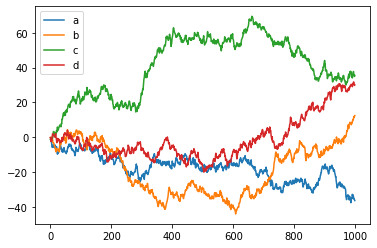

In [154]:
data.plot()

<AxesSubplot:xlabel='a', ylabel='b'>

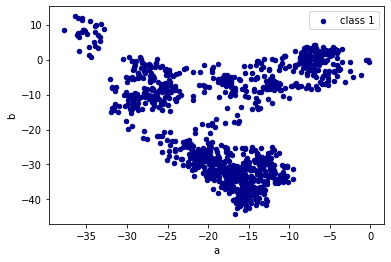

In [161]:
ax = data.plot.scatter(x="a",y="b",color="DarkBlue",label = "class 1")
ax

<AxesSubplot:xlabel='a', ylabel='c'>

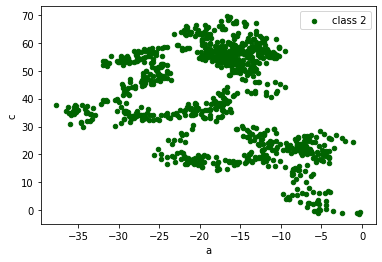

In [162]:
ax2 = data.plot.scatter(x="a",y="c",color="DarkGreen",label = "class 2")
ax2

In [167]:
aa = data.plot.scatter(x="a",y="c",color="DarkGreen",label = "class 2",ax=ax)
aa

<AxesSubplot:xlabel='a', ylabel='c'>

<AxesSubplot:ylabel='Density'>

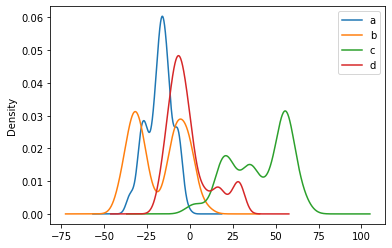

In [169]:
data.plot.kde()

<AxesSubplot:>

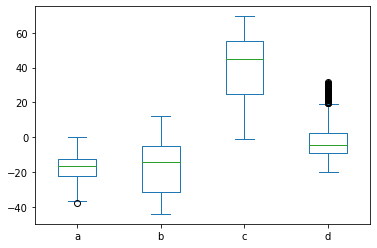

In [170]:
data.plot.box()

<AxesSubplot:>

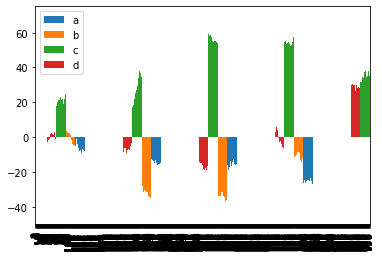

In [171]:
data.plot.bar()

In [1]:
import numpy as np
import pandas as pd
in

,one,two
0,张三,1.0
1,李四,NaN
2,张三,3.0


In [3]:
dd["two"].f

2.0

In [194]:
type(dd["one"])

pandas.core.series.Series